In [2]:
import pandas as pd
import numpy as np
from os import listdir

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from pylab import cm
import scipy.optimize


#from my_functions import find_min_distance

In [3]:
px_size = 0.1625


In [4]:
directories = ["Baz_Jupiter_polar//", "Baz_Jupiter_nonpolar//", "Par1_Jupiter//", "Par1_Baz//", "Par1_Jupiter_long//", "aPKC_Baz_long//"]
timeintervals = [30, 30, 30, 60, 600, 600]
green_channel = ["Baz", "Baz", "Par1", "Par1", "Par1", "aPKC"]
red_channel = ["Jupiter", "Jupiter", "Jupiter", "Baz", "Jupiter", "Baz"]

info_df = pd.DataFrame(data={"directory": directories, "timeinterval": timeintervals, "green_channel": green_channel, "red_channel": red_channel})


In [14]:
channel_color = "green"
info_subdf = info_df[(info_df.green_channel == "Par1") & (info_df.timeinterval == 600)]# & (info_df.red_channel == "Baz") & (info_df.timeinterval < 600)]

#channel_color = "red"
#info_subdf = info_df[(info_df.red_channel == "Jupiter") & (info_df.timeinterval == 600)]# & (info_df.red_channel == "Baz") & (info_df.timeinterval < 600)]



#channel_color = "green"
#info_subdf = info_df[(info_df.green_channel == "Baz")]# & (info_df.directory == "Baz_Jupiter_polar//")]

#channel_color = "red"
#info_subdf = info_df[(info_df.red_channel == "Baz") & (info_df.timeinterval == 60)]

#channel_color = "green"
#info_subdf = info_df[(info_df.green_channel == "aPKC")]# & (info_df.red_channel == "Jupiter")]


intensities_all = pd.DataFrame()
for directory in info_subdf.directory.unique():
    
    files = listdir(directory)
    dt = info_subdf[info_subdf.directory==directory].timeinterval.values[0]
    if dt == 30: limit = 120
    elif dt == 60: limit = 60
    elif dt == 600: limit = 16

    for index, file in enumerate(files[0::2]):
    #for index, file in enumerate(files[0::3]):
        if channel_color in file:
            intensities = pd.read_csv(directory+file)[0:limit]
            background = pd.read_csv(directory+files[index*2+1])[0:limit]
            #background = pd.read_csv(directory+files[index*3+1])[0:limit]
            #nonablated = pd.read_csv(directory+files[index*3+2])[0:limit]
            print(file, files[index*2+1])

            #subtract background
            intensities["Background_norm"] = (intensities.Mean-background.Mean)
            #intensities["Background_norm"] = (intensities.Mean-background.Mean)/background.Mean
            #intensities["Background_norm"] = intensities.Mean/background.Mean

            #intensities["Background_norm"] = intensities.Mean/nonablated.Mean
            #intensities["Background_norm"] = nonablated.Mean-background.Mean

            intensities["Mean"] = intensities.Background_norm

            
            #normalize
            #intensities["Normalized"] = (intensities.Mean - intensities.Mean[0])
            intensities["Normalized"] = intensities.Mean    
            
            #intensities["Normalized"] = intensities["Normalized"]/intensities.Mean[0]

            intensities[file] = intensities["Normalized"]#/intensities["Normalized"].max()#/intensities.Mean[0]#intensities["Normalized"].min()
            intensities[file+"_time"] = np.arange(len(intensities))*dt

            if dt <6:
                index = pd.date_range('1/1/2000', periods=len(intensities[file]), freq=str(dt)+"s")
                series = pd.Series(intensities[file].values, index=index)
                
                resample_time = 1*60
                resampled_data = series.resample(str(resample_time/60)+ " min").mean()
                #print(series.resample(str(resample_time)+ "s").mean())
                #intensities[file+"_time"] = np.arange(len(intensities))*resample_time

                final_intensities = pd.DataFrame(data={file: resampled_data.values, file+"_time": np.arange(len(resampled_data))*resample_time})
            
            else: final_intensities = intensities.reset_index()[[file, file+"_time"]]

            intensities_all = pd.concat([intensities_all, final_intensities], axis=1)





20210525_Oocyte4_position1_green.csv 20210525_Oocyte4_position1_green_background.csv
20210525_Oocyte4_position2_green.csv 20210525_Oocyte4_position2_green_background.csv
20210525_Oocyte4_position3_green.csv 20210525_Oocyte4_position3_green_background.csv
20210526_Oocyte1_position1_green.csv 20210526_Oocyte1_position1_green_background.csv
20210526_Oocyte1_position3_green.csv 20210526_Oocyte1_position3_green_background.csv
20210526_Oocyte1_position4_green.csv 20210526_Oocyte1_position4_green_background.csv
20210526_Oocyte4_position6_green.csv 20210526_Oocyte4_position6_green_background.csv
20210528_Exp4_position3_green.csv 20210528_Exp4_position3_green_background.csv
20210528_Exp4_position7_green.csv 20210528_Exp4_position7_green_background.csv
20210622_Exp3_position1_green.csv 20210622_Exp3_position1_green_background.csv
20210622_Exp3_position6_green.csv 20210622_Exp3_position6_green_background.csv
20210714_Exp1_position1_green.csv 20210714_Exp1_position1_green_background.csv
20210714_E

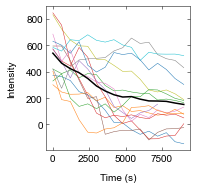

In [15]:

## Plotting
COLOR = 'black'
#COLOR = 'white'
plot_size="small"
#plot_size="big"


# Edit the font, font size, color and axes width

if plot_size=="small":
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.linewidth'] = 0.5
    fig_width=2
    fig_height=2
    tick_size=3
else:
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 1
    fig_width=5
    fig_height=5
    tick_size=7
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(fig_width, fig_height))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

#ax.set_ylim([-100, 600])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=tick_size, width=plt.rcParams['axes.linewidth'], direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Intensity', labelpad=10)




df = pd.DataFrame(index=np.arange(0,11000,30))

for oocyte in intensities_all.columns[0::2]:
    ax.plot(intensities_all[oocyte+"_time"], intensities_all[oocyte], linewidth=plt.rcParams['axes.linewidth'])

    df[oocyte] = np.nan
    for idx, time in enumerate(intensities_all[oocyte+"_time"].dropna()):
        df.loc[int(time), oocyte] = intensities_all[oocyte][idx]



        
df.dropna(axis = 0, how = 'all', inplace=True)
df['Mean'] = df.mean(axis=1)
ax.plot(df.index.values, df.Mean, linewidth=plt.rcParams['axes.linewidth']*3, color=COLOR)
num=int(intensities_all.shape[1]/2)

    

In [18]:
intensities_all

,20190520_Oocyte2_green.csv,20190520_Oocyte2_green.csv_time,20190617_Oocyte6_green.csv,20190617_Oocyte6_green.csv_time,20190711_Oocyte4_green.csv,20190711_Oocyte4_green.csv_time,20190902_Oocyte2_green.csv,20190902_Oocyte2_green.csv_time,20201110_Oocyte1_green.csv,20201110_Oocyte1_green.csv_time,...,20210315_Oocyte3_green.csv,20210315_Oocyte3_green.csv_time,20210326_Oocyte11_green.csv,20210326_Oocyte11_green.csv_time,20210326_Oocyte7_green.csv,20210326_Oocyte7_green.csv_time,20210326_Oocyte9_green.csv,20210326_Oocyte9_green.csv_time,20210329_Oocyte1_green.csv,20210329_Oocyte1_green.csv_time
0,-50.641,0,-37.977,0,-53.952,0,69.662,0,-25.814,0,...,-39.878,0,-62.265,0,-19.297,0,-25.226,0,57.866,0
1,-38.613,30,-30.966,30,-81.400,30,68.264,30,21.445,30,...,-20.250,30,-48.910,30,-29.485,30,-6.419,30,48.935,30
2,-41.244,60,-4.853,60,-55.757,60,44.619,60,22.835,60,...,-29.387,60,-54.776,60,-54.435,60,-23.419,60,58.789,60
3,-45.858,90,-8.849,90,-65.431,90,42.246,90,-20.175,90,...,-34.584,90,-42.927,90,-52.263,90,-47.600,90,58.184,90
4,-54.663,120,4.044,120,-75.791,120,34.302,120,-3.824,120,...,-40.477,120,-33.362,120,-46.506,120,-11.881,120,65.701,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,218.442,3450,95.456,3450,176.135,3450,196.966,3450,277.980,3450,...,121.533,3450,126.819,3450,180.907,3450,130.338,3450,106.838,3450
116,224.272,3480,105.013,3480,180.912,3480,196.855,3480,294.428,3480,...,117.788,3480,122.315,3480,164.391,3480,152.757,3480,102.478,3480
117,203.948,3510,115.499,3510,164.732,3510,212.322,3510,277.535,3510,...,105.272,3510,105.136,3510,172.523,3510,161.320,3510,113.713,3510
118,247.294,3540,108.812,3540,184.129,3540,199.210,3540,280.618,3540,...,111.523,3540,117.245,3540,161.226,3540,147.512,3540,122.668,3540


In [13]:
title="Baz_ablation_1h_with_Par1"
ax.text(0, 180, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [10]:
title="Par1_ablation_1h_with_Baz"
ax.text(3000, 600, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [17]:
title="Baz_ablation_1h_small"
ax.text(0, 270, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

In [16]:
title="Par1_ablation_long_small"
ax.text(7500, 800, 'n='+str(num), size=plt.rcParams['font.size'])
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')

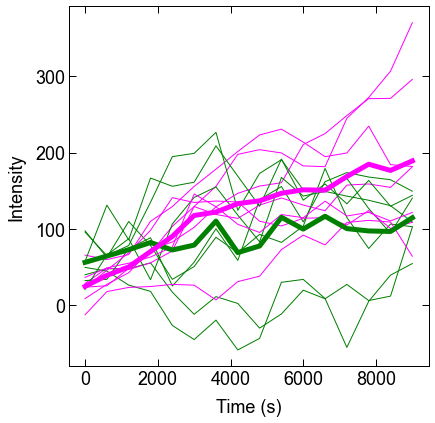

In [146]:
files = listdir(directory)

COLOR = 'black'
#COLOR = 'white'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Make text editable in illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 5))

# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=7, width=1, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=7, width=1, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

# Add the x and y-axis labels
ax.set_xlabel('Time (s)', labelpad=10)
ax.set_ylabel('Intensity', labelpad=10)


intensities_all = pd.DataFrame()
intensities_all_red = pd.DataFrame()

green_last = []
red_last = []





for index, file in enumerate(files[0::4]):

    intensities = pd.read_csv(directory+file)
    background = pd.read_csv(directory+files[index*4+1])


    intensities_red = pd.read_csv(directory+files[index*4+2])
    background_red = pd.read_csv(directory+files[index*4+3])


    #subtract background
    intensities["Background_norm"] = (intensities.Mean-background.Mean)
    #intensities["Background_norm"] = intensities.Mean
    intensities["Mean"] = intensities.Background_norm

    intensities_red["Background_norm"] = (intensities_red.Mean-background_red.Mean)
    #intensities_red["Background_norm"] = intensities_red.Mean
    intensities_red["Mean"] = intensities_red.Background_norm

    #normalize
    if "ablation" in title:
        #intensities["Normalized"] = intensities.Mean - intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean/intensities.Mean[0]
        #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean# - intensities.Mean[0]
        intensities_red["Normalized"] = intensities_red.Mean# - intensities_red.Mean[0]
    else:
    #intensities["Normalized"] = intensities.Mean - intensities.Mean.min()
        intensities["Normalized"] = intensities.Mean - intensities.Mean[2]
    
    intensities[file] = intensities["Normalized"]#/intensities["Normalized"].iloc[0]
    intensities_red[files[index*2+1]] = intensities_red["Normalized"]#/intensities_red["Normalized"].max()


    #final_intensities = intensities[intensities[intensities[file]==0].index.item():].reset_index()[file]
    
    final_intensities = intensities.reset_index()[file]
    final_intensities_red = intensities_red.reset_index()[files[index*2+1]]


    try:
        green_last.append(final_intensities.iloc[16])
        red_last.append(final_intensities_red.iloc[16])
    except:
        green_last.append(final_intensities.iloc[-1])
        red_last.append(final_intensities_red.iloc[-1])
    #index = pd.date_range('1/1/2000', periods=len(final_intensities), freq='60s')
    #series = pd.Series(final_intensities.values, index=index)
    #final_intensities = series.resample("5 min").mean()

    #series = pd.Series(final_intensities_red.values, index=index)
    #final_intensities_red = series.resample("5 min").mean()







    if len(intensities)>0: #and "red" in file: #and (intensities.Mean/intensities.Mean[0]).iloc[-1]<0.5:
        intensities_all = pd.concat([intensities_all, final_intensities], axis=1)
        intensities_all_red = pd.concat([intensities_all_red, final_intensities_red], axis=1)

        ax.plot(np.arange(len(final_intensities[0:limit]))*dt, final_intensities[0:limit], linewidth=1, color="green")
        ax.plot(np.arange(len(final_intensities_red[0:limit]))*dt, final_intensities_red[0:limit], linewidth=1, color="magenta")

        #xs = np.arange(len(final_intensities_red))*dt
        #ys = final_intensities_red
        #p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess
        #popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, maxfev=10000, bounds=([-500, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
        #L, x0, k, b = popt
        # plot the results
        #ax.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")
        #print(popt)

        #plt.title(file)
        #xs = np.arange(len(final_intensities))*dt
        #ys = final_intensities
        #p0 = [max(ys), np.median(xs),0,min(ys)] # this is an mandatory initial guess
        #popt, pcov = scipy.optimize.curve_fit(sigmoid, xs, ys,p0, maxfev=10000, bounds=([-500, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
        #L, x0, k, b = popt
        # plot the results
        #ax.plot(xs, sigmoid(xs, L, x0, k, b), '--', label="fitted")
        #print(popt)

 


intensities_all['Mean'] = intensities_all.mean(axis=1)
intensities_all_red['Mean'] = intensities_all_red.mean(axis=1)

intensities_all = intensities_all[0:limit]
intensities_all_red = intensities_all_red[0:limit]
#ax.scatter(green_last, red_last)
ax.plot(np.arange(len(intensities_all.Mean))*dt, intensities_all.Mean, linewidth=5, color="green")
ax.plot(np.arange(len(intensities_all_red.Mean))*dt, intensities_all_red.Mean, linewidth=5, color="magenta")



#ax.plot(xs, monoExp(xs, m, t), linewidth=5, color="black")


In [123]:

title="aPKC_Baz_ablation_long_norm"
fig.savefig(f'{title}_{COLOR}.pdf', dpi=300, transparent=True, bbox_inches='tight')
fig.savefig(f'{title}_{COLOR}.png', dpi=300, transparent=True, bbox_inches='tight')


In [147]:
#par1_mean = intensities_all.Mean
#baz_mean = intensities_all.Mean
baz_ablation = intensities_all_red#.Mean
apkc_ablation = intensities_all#.Mean
#par1_ablation = intensities_all#_red.Mean

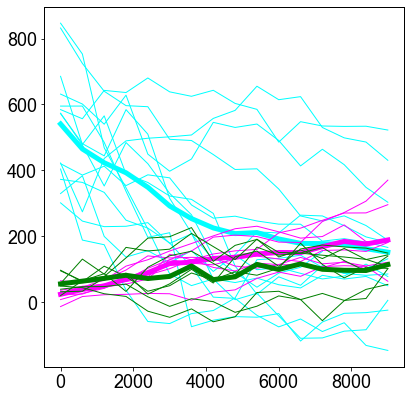

In [148]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 5))
# Add axes object to the figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

for ablation, color in zip([par1_ablation, baz_ablation, apkc_ablation], ["cyan", "magenta", "green"]):

    for column in ablation.columns:
        
        ax.plot(np.arange(len(ablation[column]))*dt, ablation[column], linewidth=1, color=color)
    
    
    ax.plot(np.arange(len(ablation.mean(axis=1)))*dt, ablation.mean(axis=1), linewidth=5, color=color)


In [201]:

def monoExp(x, m, t, k):
    #return m * (1-np.exp(-t * x))+k
    return m * (np.exp(-t * x))+k


def monoExp2(x, m, t, k):
    return m * (1-np.exp(-t * x))+k


Text(0.5, 1.0, 'Original Data')

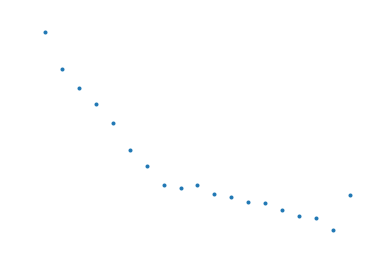

In [202]:
#xs = np.arange(34)*dt
#ys = par1_mean[2:36]


#xs = np.arange(68)*dt
#ys = baz_mean[2:70]


ys = baz_mean_ablation
xs = np.arange(len(ys))*dt

plt.plot(xs, ys, '.')
plt.title("Original Data")

In [203]:


xs = xs[0:-1]
ys = ys[0:-1]

In [114]:
# perform the fit
#p0=[1,1,max(ys)]
p0 = [1, -np.log(0.5)/300, max(ys)]
p0 = [1, -np.log(0.5)/300, 0]
params, cv = scipy.optimize.curve_fit(monoExp2, xs, ys, p0, maxfev=10000)
m, t, k = params
t_half = np.log(0.5)/(-t)

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp2(xs, m, t, k))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp2(xs, m, t, k), '--', label="fitted")
plt.title("Fitted Exponential Curve")

#plt.plot(xs, monoExp2(xs, m_baz, t_baz, k_baz), '--', label="fitted")

# inspect the parameters
print(f"Y = {m} * (1-e^(-{t} * x))")
#print(f"Tau = {tauSec * 1e6} µs")
print(f"T_1/2 = {t_half}")

NameError: name 'ys' is not defined

[ 1.03705515e+02  3.22990809e+03  5.72365896e-04 -1.88909110e+01]


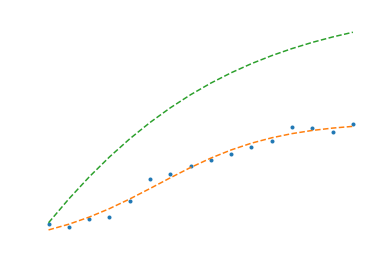

In [438]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)



#baz_mean_ablation = intensities_all.Mean
#ys_sigm = baz_mean_ablation[0:121]
#ys = baz_mean_ablation

xs_sigm = df.index.values
ys_sigm = df.Mean.values#-df.Mean.values[0]
#ys_sigm = ys_sigm/ys_sigm.max()

#index = pd.date_range('1/1/2000', periods=len(ys_sigm), freq='60s')
#series = pd.Series(ys_sigm.values, index=index)
#ys_sigm = series.resample("1 min").mean()

#xs_sigm = np.arange(len(ys_sigm))*dt


p0 = [max(ys_sigm), np.median(xs_sigm),0,min(ys_sigm)] # this is an mandatory initial guess

#popt, pcov = scipy.optimize.curve_fit(sigmoid, xs_sigm, ys_sigm,p0, maxfev = 10000)#, method='dogbox')
popt, pcov = scipy.optimize.curve_fit(sigmoid, xs_sigm, ys_sigm,p0, maxfev = 10000)#, bounds=([-500, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))

L_sigm, x0_sigm, k_sigm, b_sigm = popt


# plot the results
plt.plot(xs_sigm, ys_sigm, '.', label="data")

#xs_sigm = np.arange(len(ys_sigm)+20)*dt

plt.plot(xs_sigm, sigmoid(xs_sigm, L_sigm, x0_sigm, k_sigm, b_sigm), '--', label="fitted")
plt.title("Fitted Sigmoidal Curve")
print(popt)
#plt.plot(xs_sigm, monoExp2(xs_sigm, m, t, k), '--', label="fitted")
plt.plot(xs_sigm, sigmoid(xs_sigm, L_l, x0_l, k_l, b_l), '--', label="fitted")
#plt.plot(xs_sigm, sigmoid(xs_sigm, L_aPKC, x0_aPKC, k_aPKC, b_aPKC), '--', label="fitted")

#plt.plot(xs_sigm, monoExp2(xs_sigm, m_baz, t_baz, k_baz), '--', label="fitted")



In [429]:

L_l, x0_l, k_l, b_l = popt


In [151]:
L_aPKC, x0_aPKC, k_aPKC, b_aPKC = popt
